In [1]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")

In [2]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&access_type=offline
waiting for authentication ...
authentication succeeded


,daniel.riveraa@udea.edu.coDANIEL FELIPE RIVERA ARROYAVEgoogle id: 107960807606835866040authorization code: 4/ZwCRGGpHAUihdaeSqCBaFOu6dVTicOwRmRQpHm4gEyo5cQZDhZXfPOUEQ49FAd2u0lfShi1K8ecZ7zMK7oJ6he4


In [5]:
%%writefile ./utils/student_function/PS07.py
import numpy as np

class BTNode:
    
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left  = None
        self.right = None
        self.parent = None
        if left is not None:
            self.add_left(left)
        if right is not None:
            self.add_right(right)
    
    def add_left(self, value):
        assert self.left is None, "node already has left child"
        self.left  = self.__class__(value) if not isinstance(value,self.__class__) else value
        self.left.parent = self
        return self
        
    def add_right(self, value):
        assert self.right is None, "node already has right child"
        self.right  = self.__class__(value) if not isinstance(value,self.__class__) else value
        self.right.parent = self
        return self
    
    def swap_children(self):
        tmp = self.left
        self.left = self.right
        self.right = self.left
        return self
    
    def insert_ordered(self, new_value):
        if new_value < self.value:
            if self.left is None:
                self.add_left(new_value)
                return self.left
            else:
                return self.left.insert_ordered(new_value)
        else:
            if self.right is None:
                self.add_right(new_value)
                return self.right
            else:
                return self.right.insert_ordered(new_value)
        
    def ird(self):
        if self.value==None:
            return []
        s1 = self.left.ird() if self.left is not None else []
        s2 = self.right.ird() if self.right is not None else []
        return s1+[self.value]+s2    
    
    def to_indented_string(self, level, prefix=""):
        s = (" "*2*level + prefix + str(self.value) + "\n") if self.value is not None else ""
        s += self.left.to_indented_string(level+1, prefix="L: ") if self.left is not None else ""
        s += self.right.to_indented_string(level+1, prefix="R: ") if self.right is not None else ""
        return s       

    def __repr__(self):
        return self.to_indented_string(0, prefix="root: ")

    def clone(self):
        r = self.__class__(self.value)
        
        if self.left is not None:
            r.left = self.left.clone()
            r.left.parent = r
        if self.right is not None:
            r.right = self.right.clone()
            r.right.parent = r
        
        return r
    
    @classmethod
    def from_list(cls, a_list):
        r = cls(a_list[0])
        for i in a_list[1:]:
            r.insert_ordered(i)
        return r
    
    @classmethod
    def sort_list(cls, a_list):
        r = cls.from_list(a_list)
        return np.r_[r.ird()]

Writing ./utils/student_function/PS07.py


In [6]:
import PS07
reload(PS07)
k = PS07.BTNode.from_list([10,2,12,1,4])
k.ird()

[1, 2, 4, 10, 12]

In [7]:
k.clone().ird()

[1, 2, 4, 10, 12]

## Árboles AVL

Un árbol binario de búsqueda  se cumple que para cualquier nodo x, todos los datos de los nodos a la izquierda de x son menores que el dato de x y todos los datos de los nodos a la derecha de x son mayores que el dato de x.

Esto nos permite realizar **búsquedas binarias** sobre el árbol de manera eficiente. Si el árbol no está balanceado, la búsqueda se vuelve menos eficiente, con lo que nos interesa que, según insertamos nuevos nodos, el árbol se mantenga **binario de búsqueda** y **balanceado**.

P.ej. el siguiente árbol no es balanceado porque tiene todos los nodos colgando siempre de la rama derecha.

In [5]:
k = PS07.BTNode.from_list([10,12,14,18,20])
print k
k.ird()

root: 10
  R: 12
    R: 14
      R: 18
        R: 20



[10, 12, 14, 18, 20]

en cambio el siguiente tiene los nodos más balencados y produce el mismo IRD

In [6]:
k = PS07.BTNode.from_list([14,10,20,18,12])
print k
k.ird()


root: 14
  L: 10
    R: 12
  R: 20
    L: 18



[10, 12, 14, 18, 20]

dado un nodo cualquiera, el **factor de balance** se define como la diferencia de la altura de su hijo izquierda y la de su hijo derecho.

Un árbol AVL (por  los soviéticos Adelsson-Velski y Landis, que lo inventaron) es un árbol en el que el factor de balance de cualquier nodo es **estrictamente menor** que 2.

En los siguientes ejercicios desarrollarás métodos que ayudan a convertir un árbol binario de búsqueda en un árbol AVL, rebalanceando los nodos, sin perder sus propiedades para la búsqueda binaria.

## Ejercicio 1

completa el método `height` para que devuelva la altura de un nodo y el método `balance_factor` para que calcule el factor de balanceo de cada nodo del árbol.

Fíjate que la función `blance_factor_tree` retorna un árbol nuevo con la misma estructura cuyos valores es el factor de balanceo de cada nodo correspondiente del árbol original.

In [12]:
%%writefile utils/student_function/PS07_01.py
import PS07
class BTNode(PS07.BTNode):
    
    def height(self):
        alturaIzquierda=0;alturaDerecha=0
        if((self.left is None) and (self.right is None)):return 0
        if self.left is not None:
            alturaIzquierda=self.left.height()+1
        if self.right is not None:
            alturaDerecha=self.right.height()+1
        if alturaIzquierda>alturaDerecha:return alturaIzquierda
        else: return alturaDerecha
    
    def balance_factor(self):
        a=0;b=0
        if self.left is not None:
            a=self.left.height()+1
        if self.right is not None:
            b=self.right.height()+1
        result=(a-b)
        
        return result
    
    def balance_factor_tree(self):
        r = self.__class__(self.balance_factor(), \
                           left=self.left.balance_factor_tree() if self.left is not None else None,
                           right=self.right.balance_factor_tree() if self.right is not None else None,
                          )
        return r

Overwriting utils/student_function/PS07_01.py


por ejemplo, para el siguiente árbol

    k = st.BTNode.from_list([2,1,12,-11,4,3,6,5,1])
    
    ---
    2
      L: 1
        L: -11
        R: 1
      R: 12
        L: 4
          L: 3
          R: 6
            L: 5    

- su altura es 4
- su factor de balanceo (el del nodo raíz) es -2
- el árbol de factores de balanceo de todos los nodos es

    root: -2
      L: 0
        L: 0
        R: 0
      R: 3
        L: -1
          L: 0
          R: 1
            L: 0

In [13]:
import PS07_01 as st
reload(st)
k = st.BTNode.from_list([2,1,12,-11,4,3,6,5,1])
a=k.balance_factor_tree()
a

root: -2
  L: 0
    L: 0
    R: 0
  R: 3
    L: -1
      L: 0
      R: 1
        L: 0

In [6]:
k.height()

4

In [7]:
k.right.height()

3

In [8]:
k.balance_factor()

-2

In [194]:
k.left.height()

6

In [137]:
k.balance_factor_tree()

root: -2
  L: -1
    L: -5
      R: -4
        R: -2
          L: -1
            R: -1
          R: -2
            R: -1
              R: -1
    R: -4
      L: -1
        R: -1
      R: 2
        L: -2
          L: -1
            L: -1
            R: -1
          R: -2
            R: -1
              R: -1
        R: -1
  R: 5
    L: 0
      L: -4
        L: -1
          L: -1
          R: -1
        R: -2
          L: 0
            L: -1
              L: -1
            R: -1
          R: -3
            R: -2
              L: -1
              R: -1
                L: -1
      R: -1
        L: -1
          L: -2
            R: -1
              L: -1
              R: -1
          R: -2
            R: -1
              R: -1
        R: -3
          R: -2
            R: -1
              R: -1
    R: -1

y para el siguiente árbol

- su factor de balance es 2
- su altura es 2

In [14]:
k = st.BTNode("c", left=st.BTNode("b", left=st.BTNode("a")))
k

root: c
  L: b
    L: a

In [15]:
k.balance_factor()

2

In [16]:
k.height()

2

#### comprueba tu código con el corrector automático

In [17]:
!./run CHECK_SOLUTION PS07_01


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [18]:
!./run SUBMIT_SOLUTION PS07_01

connecting ... registering submission for daniel.riveraa@udea.edu.co ...
no config found for section PS07, allowing all submissions

** CORRECTO **
your submissions sheet is https://docs.google.com/spreadsheets/d/1QjA5eGBEkEfHxuQDJaqn7YQXH-ECIalATeOgF8dw-nU
----
evaluation result 5.0 , submission registered


## Ejercicio 2

Una operación de balanceo consiste en reacomodar los registros de un árbol binario de tal forma que los factores de balance de todos los registros sean -1, 0, ó +1 y que **el recorrido INORDEN sea el mismo que antes del reacomodo**.

Operaciones de Rebalanceo:

1. Una rotación a la derecha.
2. Una rotación a la izquierda.
3. Doble rotación a la derecha.
4. Doble rotación a la izquierda.

Para explicar lo referente a las rotaciones asumamos la siguiente convención:

Sea **Fb(P)** el factor de balance de un nodo.

Sea **P** un nodo con factor de balance no permitido.(p.ej. **Fb(P)=+2** ó **Fb(P)=-2**).


Sea **Q** la dirección del hijo izquierdo o del hijo derecho de **P**, dependiendo de si **Fb(P)=+2**  ó  **Fb(P)= - 2**, es decir, si factor de balance de **P** es +2 entonces **Q** es el hijo izquierdo de **P** y si factor de balance de **P** es -2 entonces **Q** es el hijo derecho de **P**.

**Rotación a la derecha**

Se realiza cuando **Fb(P)=+2** y **Fb(Q)=+1**, y consiste en girar, en sentido de las manecillas del reloj, el registro P alrededor del registro Q.  Con lo que:

- P pasará a ser el nuevo hijo derecho de Q.
- El anterior hijo derecho de Q será el nuevo hijo izquierdo de P. 
- Q será la nueva raíz del árbol balanceado.
- Los nuevos factores de balance de P y Q serán cero.
- La altura del árbol balanceado disminuye en uno. 

La siguiente figura ilustra esto

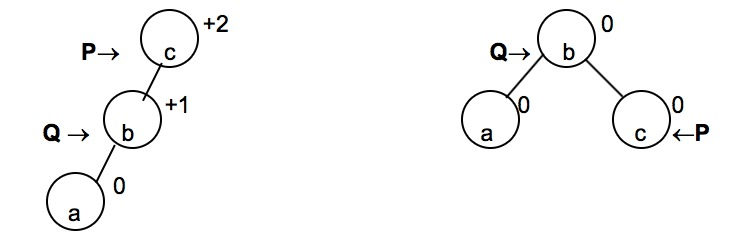

In [19]:
from IPython.display import Image
Image(filename='imgs/AVL-rotright.jpg') 

completa el método `rotate_right` para que el nodo realice una rotación a la derecha con si hizo izquierdo.

realiza un `assert` al principio del método para verificar la condición **Fb(P)=+2** y **Fb(Q)=+1**

**ATENCIÓN**: opera sobre **una copia** del propio árbol (usa `clone`), y así no lo modificarás.

In [ ]:
%%writefile utils/student_function/PS07_02.py
import PS07
class BTNode(PS07.BTNode):
    
    def height(self):
        result = # TU CODIGO AQUI
        
        return result

    def balance_factor(self):
        result = # TU CODIGO AQUI
        
        return result
    
    def balance_factor_tree(self):
        r = self.__class__(self.balance_factor(), \
                           left=self.left.balance_factor_tree() if self.left is not None else None,
                           right=self.right.balance_factor_tree() if self.right is not None else None,
                          )
        return r
    
    def rotate_right(self):
        
        assert # TU CODIGO AQUI
                
        result = # TU CODIGO AQUI
        
        return result

prueba tu código. una rotación derecha con el siguiente nodo

In [ ]:
import PS07_02 as st
reload(st)
k = st.BTNode("c", left=st.BTNode("b", left=st.BTNode("a")))
k

debería de dar

    b
      L: a
      R: c

In [ ]:
k.rotate_right()

In [ ]:
k = st.BTNode("c", left=st.BTNode("b", left=st.BTNode("a")))
print k.ird()
print k.rotate_right().ird()

y con el siguiente nodo

In [ ]:
k = st.BTNode("e", left=st.BTNode("c", left=st.BTNode("b", left="a"), right="d"), right="f")
k

debería de dar

        c
          L: b
            L: a
          R: e
            L: d
            R: f

In [ ]:
print k
print k.ird()
print k.rotate_right()
print k.rotate_right().ird()

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS07_02

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS07_02

## Ejercicio 3

Haremos ahora una **rotación a la izquierda**. Se realiza cuando **Fb(P)=-2** y **Fb(Q)=-1** y, por tanto, **Q** es el hijo derecho de **P**


- P será el nuevo hijo izquierdo de Q.
- El nuevo hijo derecho de P será el anterior hijo izquierdo Q.
- Q será la nueva raíz del árbol balanceado.
- Los factores de balance P y Q quedarán en cero.
- La altura del árbol balanceado disminuye en uno (1).


In [ ]:
%%writefile utils/student_function/PS07_03.py
import PS07
class BTNode(PS07.BTNode):
    
    def height(self):
        result = # TU CODIGO AQUI
        
        return result

    def balance_factor(self):
        result = # TU CODIGO AQUI
        
        return result
    
    def balance_factor_tree(self):
        r = self.__class__(self.balance_factor(), \
                           left=self.left.balance_factor_tree() if self.left is not None else None,
                           right=self.right.balance_factor_tree() if self.right is not None else None,
                          )
        return r
    
    def rotate_left(self):
        
        assert # TU CODIGO AQUI
                
        result = # TU CODIGO AQUI
        
        return result

prueba tu código

In [ ]:
import PS07_03 as st
reload(st)
k = st.BTNode("b", right=st.BTNode("d", right=st.BTNode("e", right="f"), left="c"), left="a")
print k
print k.ird()
print k.rotate_left()
print k.rotate_left().ird()


#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS07_03

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS07_03

## Ejercicio 4

Haremos ahora una **doble rotación a la derecha**. Se realiza cuando **Fb(P)=+2** y **Fb(Q)=-1** y, por tanto, **Q** es el hijo derecho de **P**

En este caso consideramos **R** el nodo que representa el hijo izquierdo o el hijo derecho de **Q** dependiendo de si el factor de balance de **Q** es +1 ó -1. Es decir, si el factor de balance del registro Q es +1, el registro R es el hijo izquierdo del registro Q, y si el factor de balance de Q es -1, R es el hijo derecho del registro Q.

Esta rotación consiste en una rotación a la izquierda de **Q** alrededor de **R** seguida de una rotación a la derecha de **P** alrededor de **R**, de forma que:

- P será el nuevo hijo izquierdo de Q.
- El nuevo hijo derecho de P será el anterior hijo izquierdo Q.
- Q será la nueva raíz del árbol balanceado.
- Los factores de balance P y Q quedarán en cero.
- La altura del árbol balanceado disminuye en uno (1).


In [ ]:
%%writefile utils/student_function/PS07_04.py
import PS07
class BTNode(PS07.BTNode):
    
    def height(self):
        result = # TU CODIGO AQUI
        
        return result

    def balance_factor(self):
        result = # TU CODIGO AQUI
        
        return result
    
    def balance_factor_tree(self):
        r = self.__class__(self.balance_factor(), \
                           left=self.left.balance_factor_tree() if self.left is not None else None,
                           right=self.right.balance_factor_tree() if self.right is not None else None,
                          )
        return r
    
    def double_rotate_right(self):
        
        assert # TU CODIGO AQUI
                
        result = # TU CODIGO AQUI
        
        return result
    

prueba tu código

In [ ]:
import PS07_04 as st
reload(st)
k = st.BTNode("c", left=st.BTNode("a", right="b"))
print k
print k.ird()
print k.double_rotate_right()
print k.double_rotate_right().ird()

In [ ]:
k = st.BTNode("e", left=st.BTNode("b", left="a", right=st.BTNode("d", left="c")), right="f")
print k
print k.ird()
print k.double_rotate_right()
print k.double_rotate_right().ird()

In [ ]:
k = st.BTNode("e", left=st.BTNode("b", left="c", right=st.BTNode("a", right="d")), right="f")
print k
print k.ird()
print k.double_rotate_right()
print k.double_rotate_right().ird()

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS07_04

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS07_04